In [122]:
NET = 'multi_lstm'

In [123]:
import tensorflow as tf
import datasets
import pickle
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

if NET == 'dilation':
    import experiments.dilation as experiments
elif NET == 'lstm':
    import experiments.lstm as experiments
elif NET == 'multi_lstm':
    import experiments.multi_lstm as experiments
elif NET == 'coloring':
    import experiments.coloring as experiments
elif NET == 'crossing':
    import experiments.crossing as experiments
    

In [124]:
output_path = '/om/user/xboix/share/insideness/' + NET + '/'
run_opt = experiments.get_best_of_the_family(output_path)
opt_datasets = datasets.get_datasets(output_path)
opt_datasets[50]

163
128
291


In [ ]:
import matplotlib.pyplot as plt

for opt in [run_opt[1]]:
    
    for opt_data in [opt_datasets[48]]:
        with open(opt.log_dir_base + opt.name + '/results/activations_train_DATA' + opt_data.log_name + '.pkl', 'rb') as f:
            data_point = pickle.load(f)
        
        print('--------------------')
        print(opt.name)
        print(opt_data.log_name)

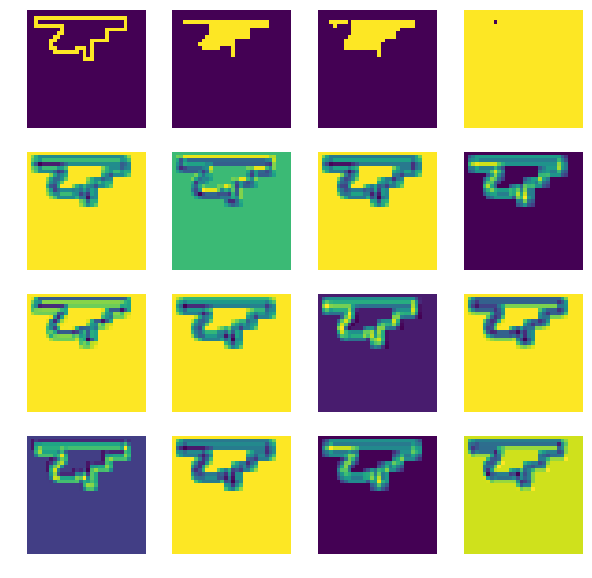

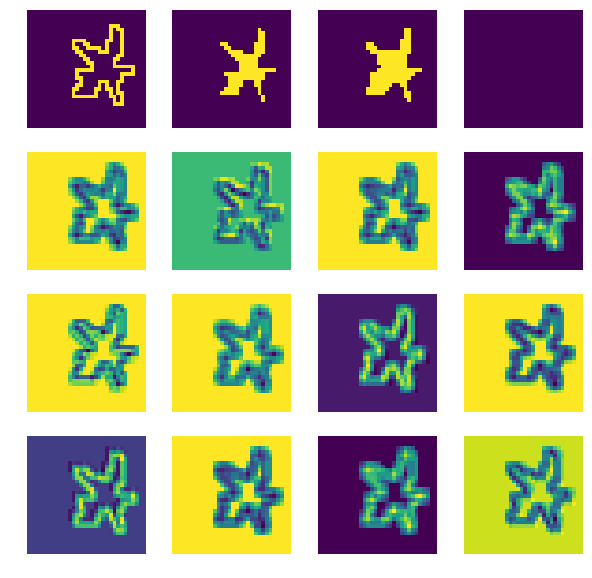

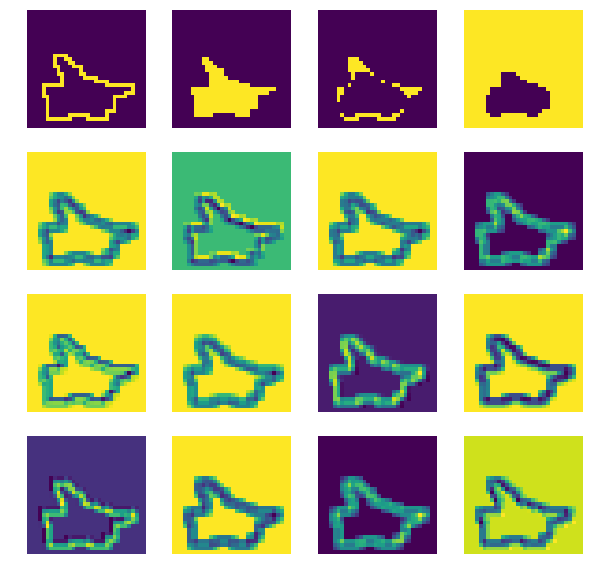

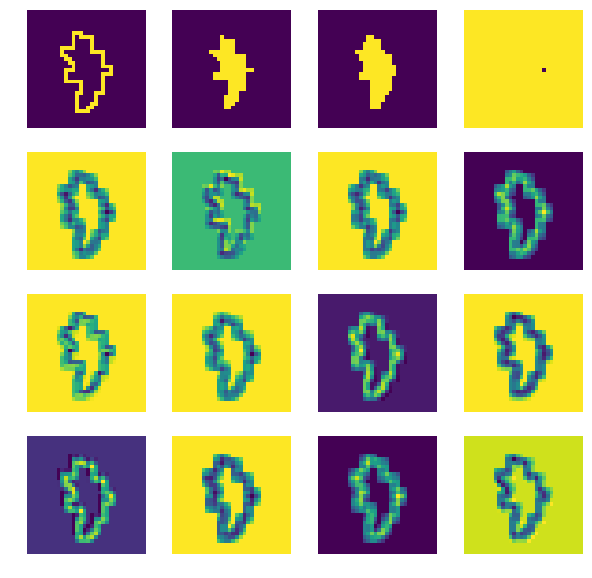

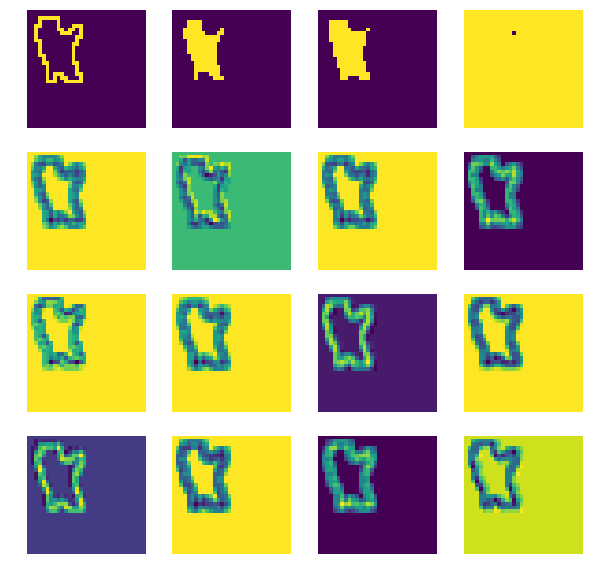

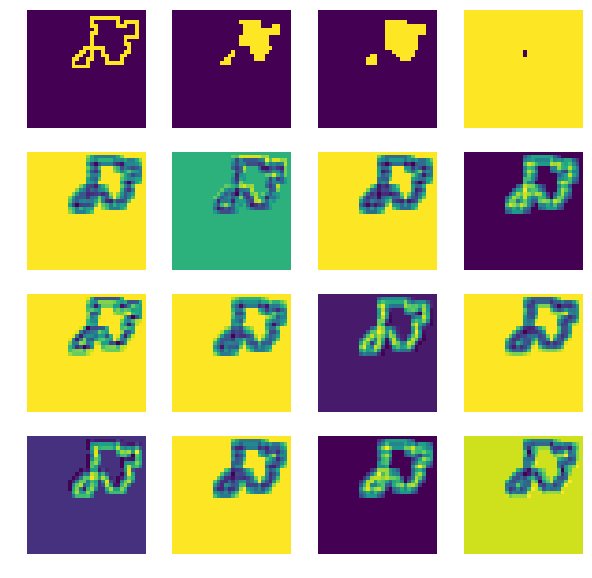

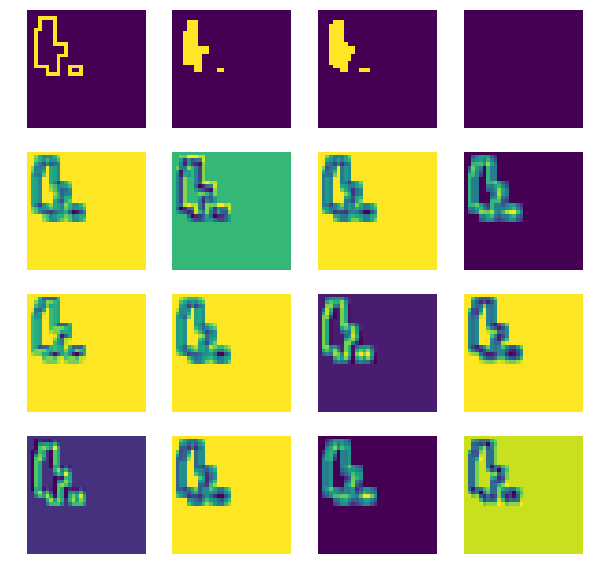

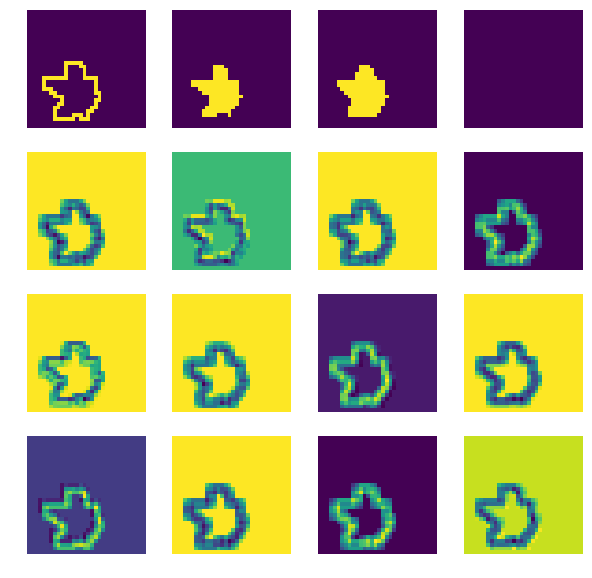

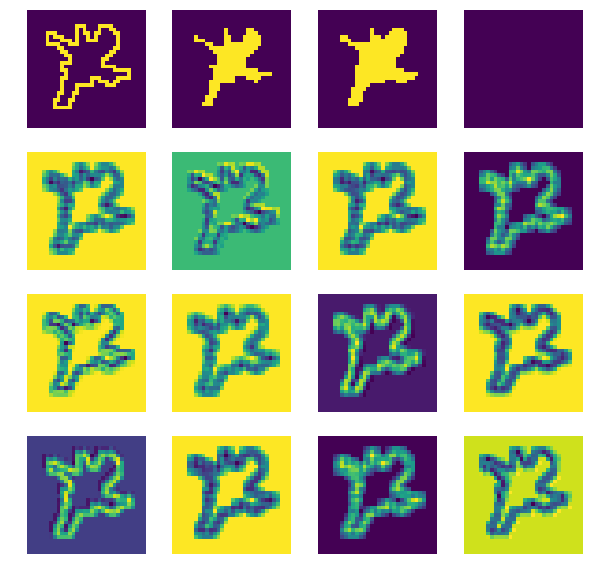

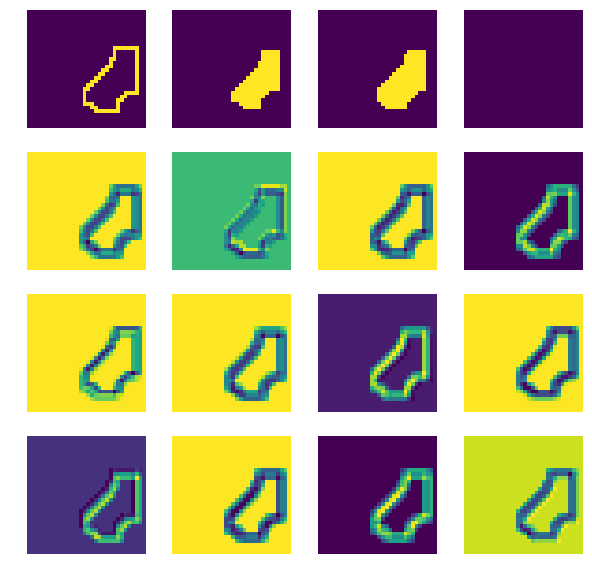

In [131]:
for num_image in range(10):
    fig = plt.figure(figsize=(10, 10))
    columns = 4
    rows = 4


    ax = []
    #for k in range(col*row):
    ax.append( fig.add_subplot(rows, columns, 1) )
    plt.imshow(np.squeeze(data_point[0][1][num_image,:,:]))
    plt.axis('off')
    ax.append( fig.add_subplot(rows, columns, 2) )
    plt.imshow(np.squeeze(data_point[0][2][num_image,:,:]))
    plt.axis('off')
    ax.append( fig.add_subplot(rows, columns, 3) )
    plt.imshow(np.squeeze(data_point[0][3][num_image,:,:]))
    plt.axis('off')
    ax.append( fig.add_subplot(rows, columns, 4) )
    plt.imshow(np.squeeze(data_point[0][4][num_image,:,:]))
    plt.axis('off')
    
    
    for k in range(columns*(rows-1)):
        ax.append( fig.add_subplot(rows, columns, 5+k) )
        plt.imshow(np.squeeze(data_point[0][0][0][0][0][num_image,:,:,k])) #15:45
        plt.axis('off')
    

In [111]:
np.shape(data_point[0][0][0])

(32, 42, 42, 4)

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


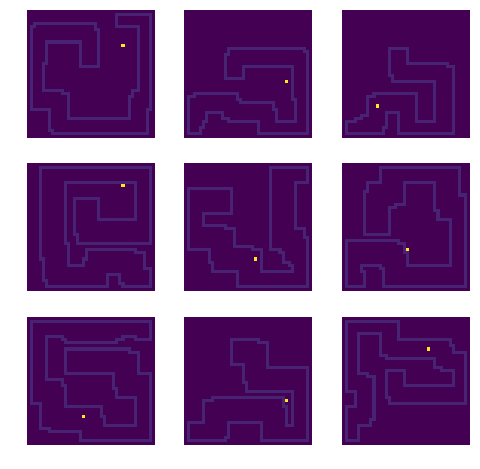

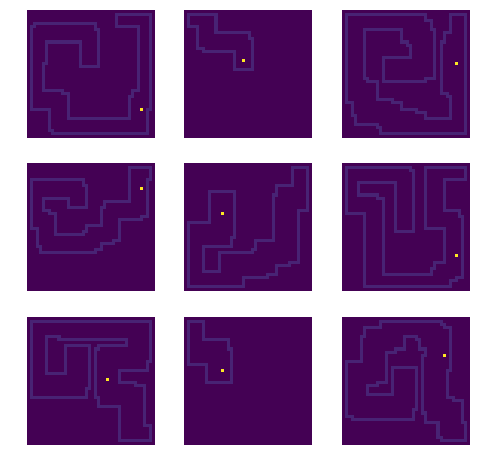

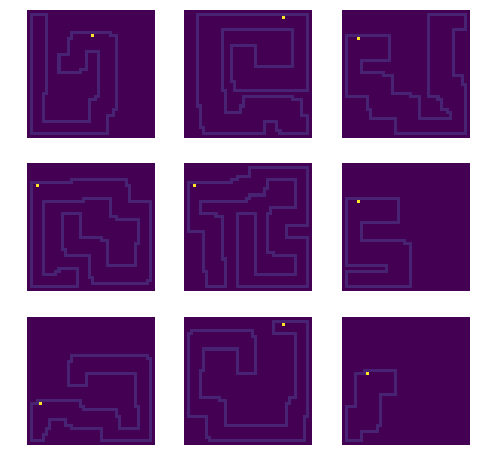

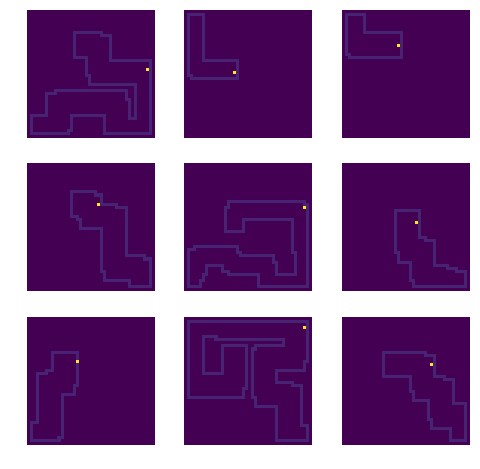

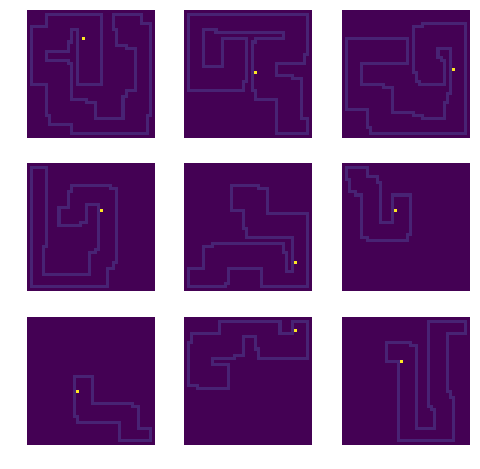

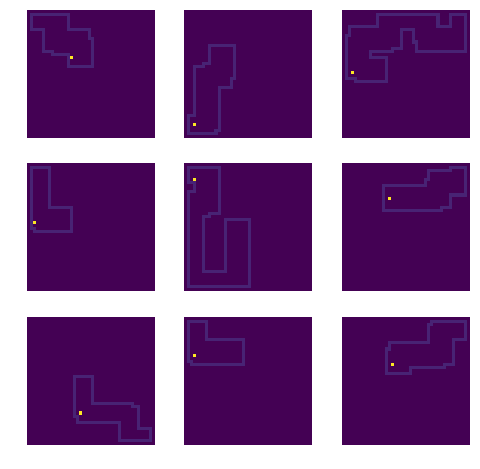

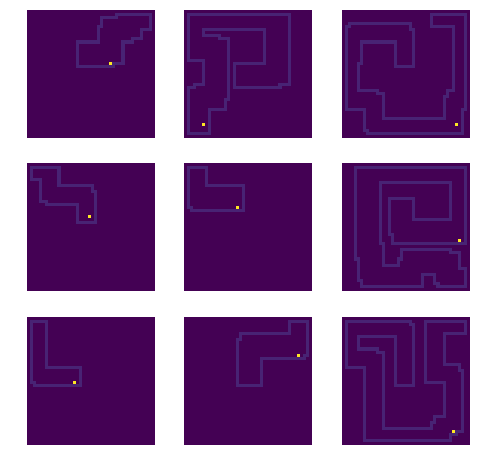

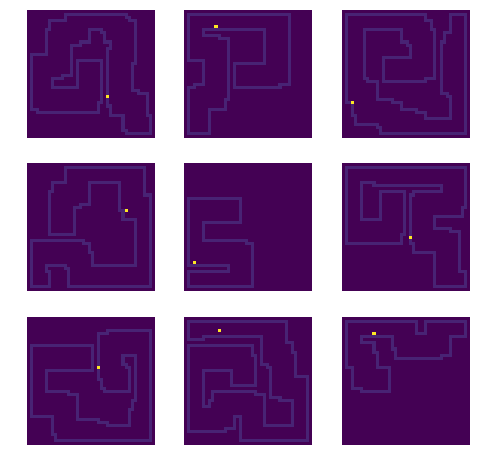

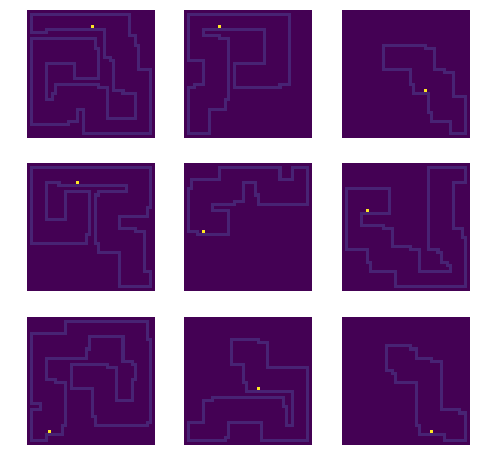

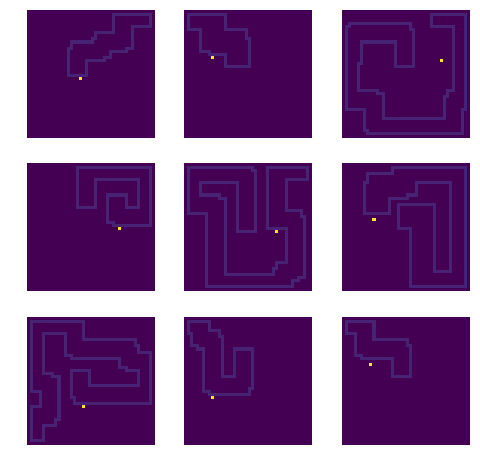

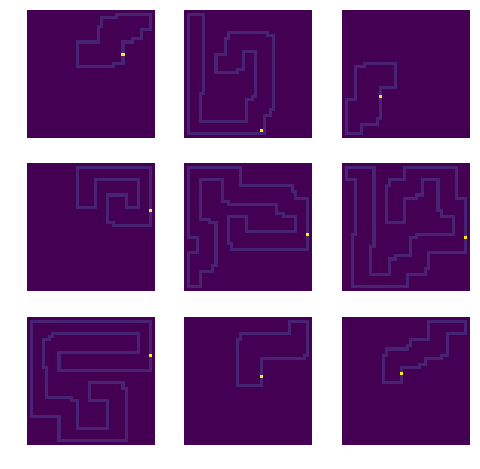

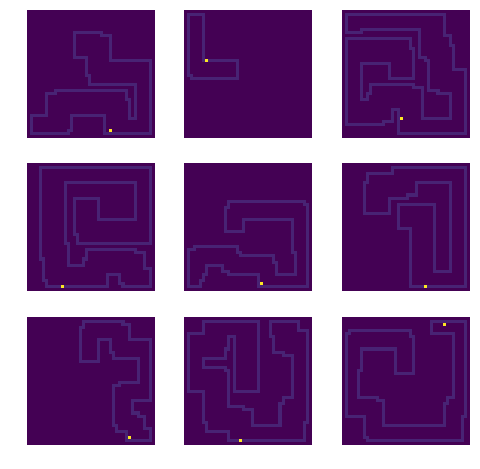

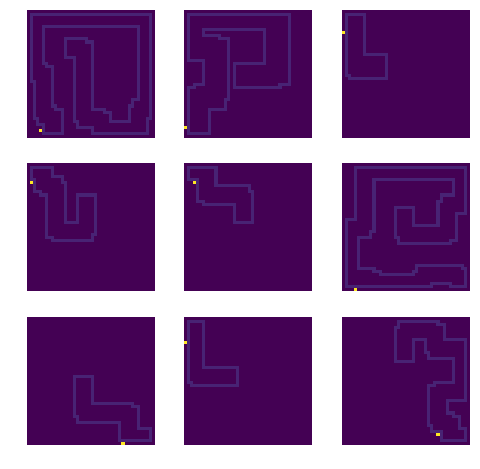

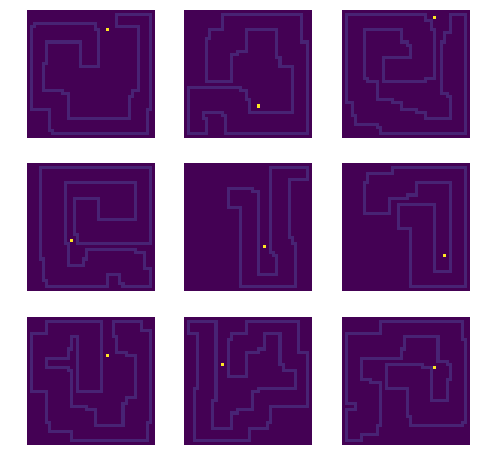

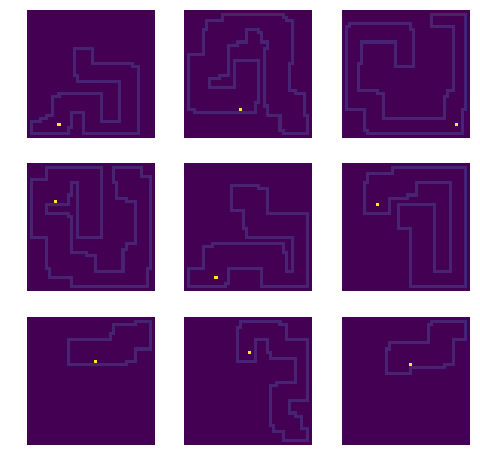

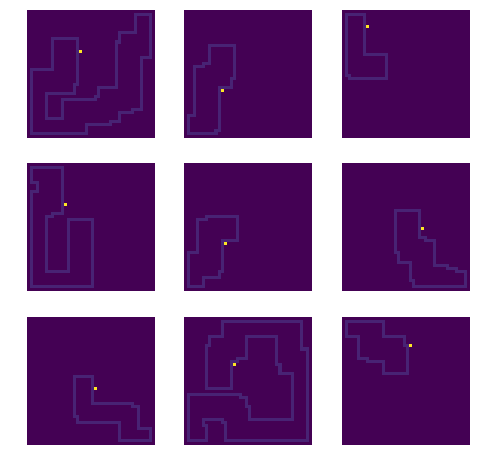

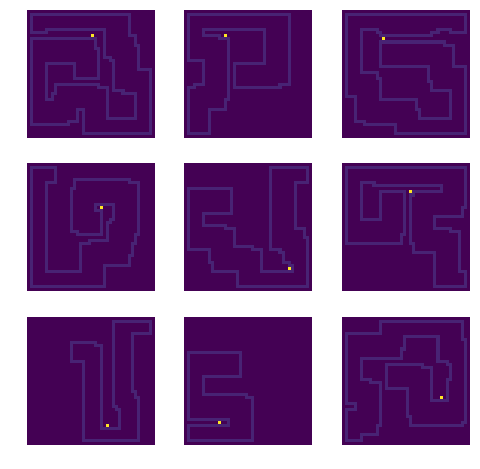

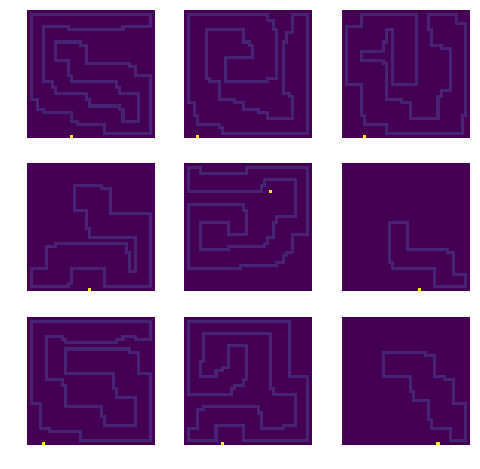

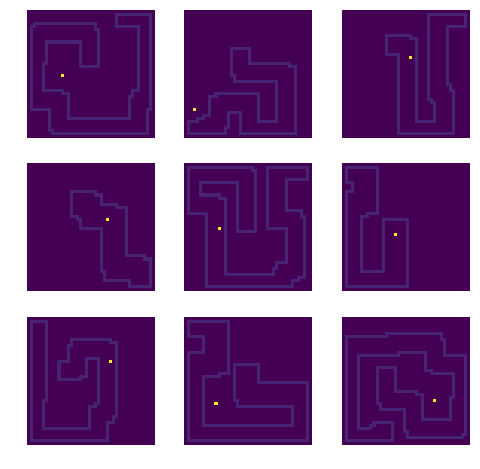

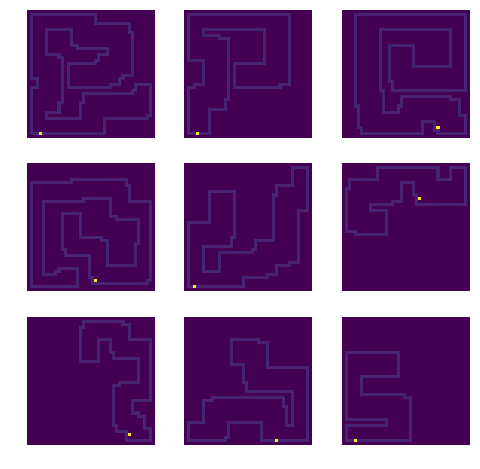

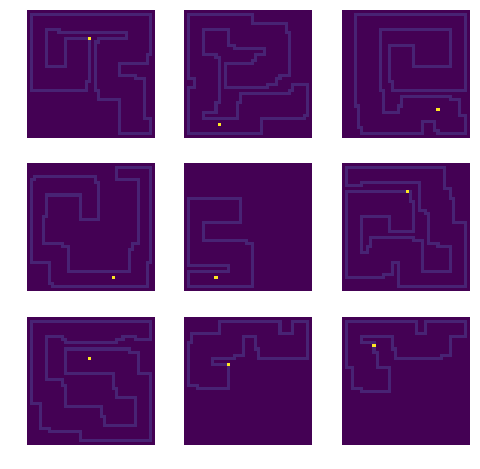

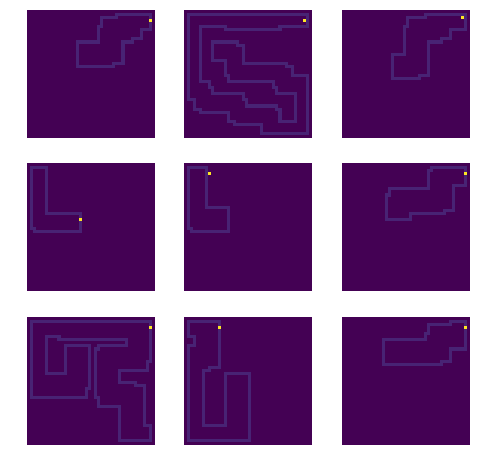

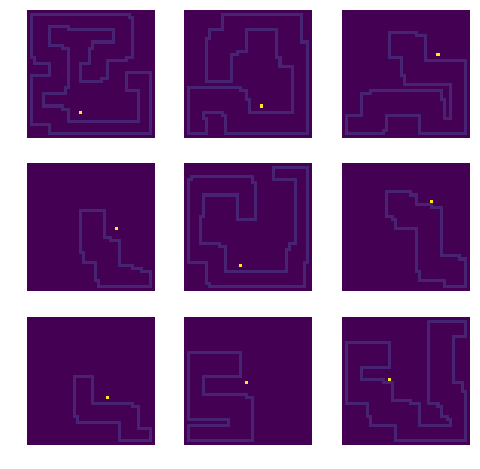

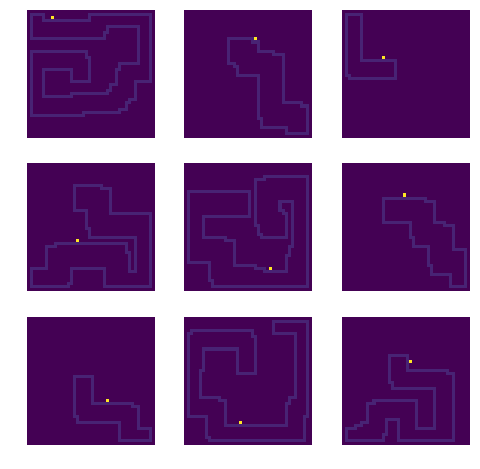

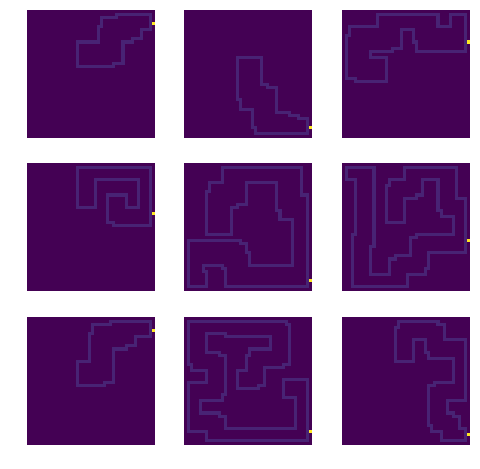

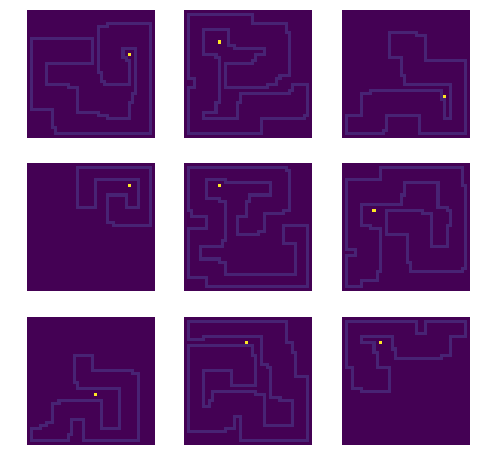

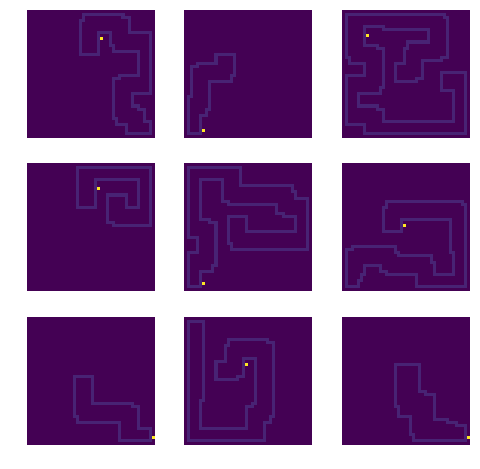

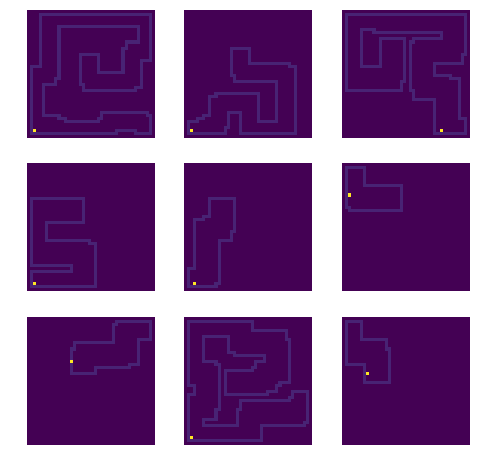

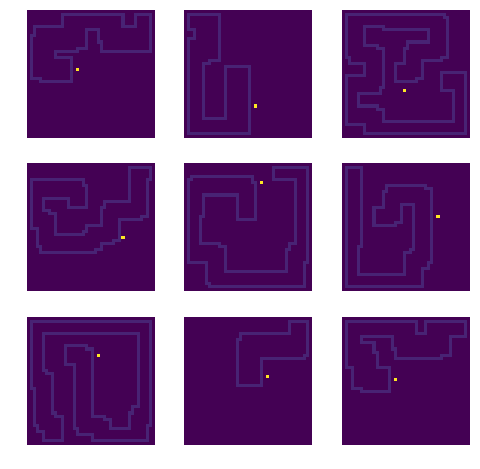

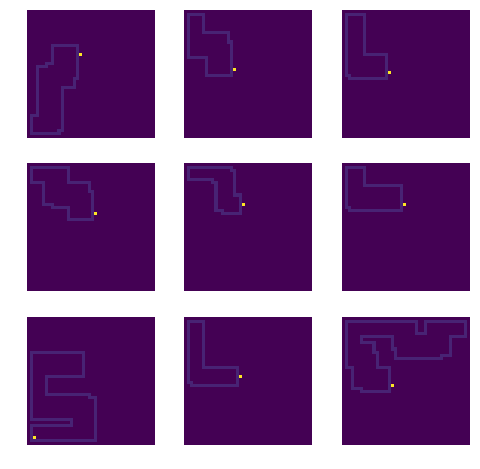

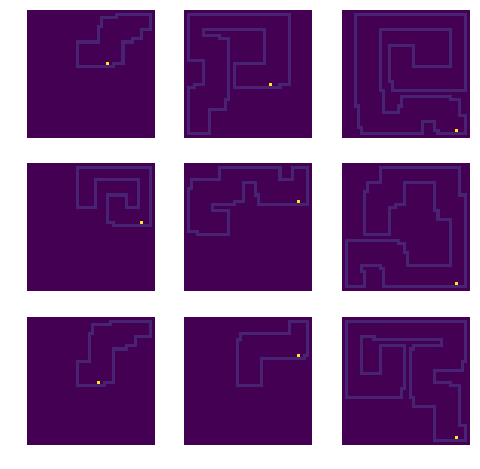

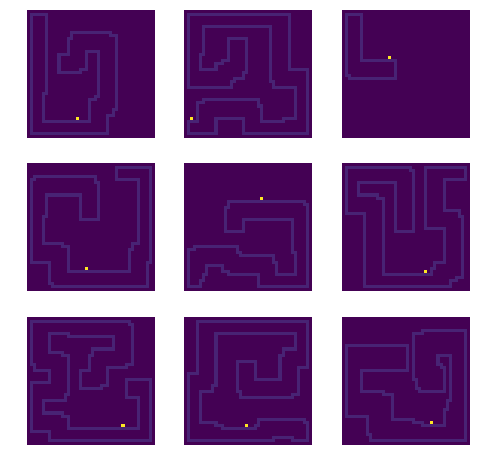

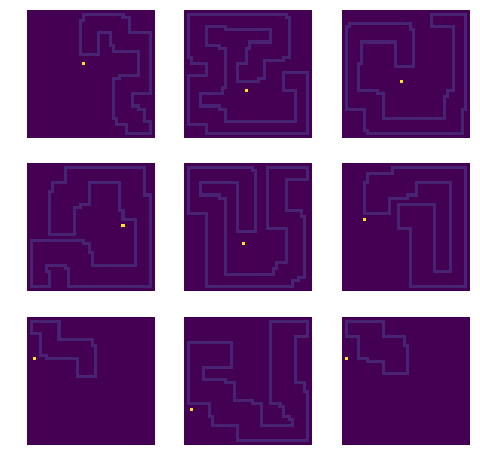

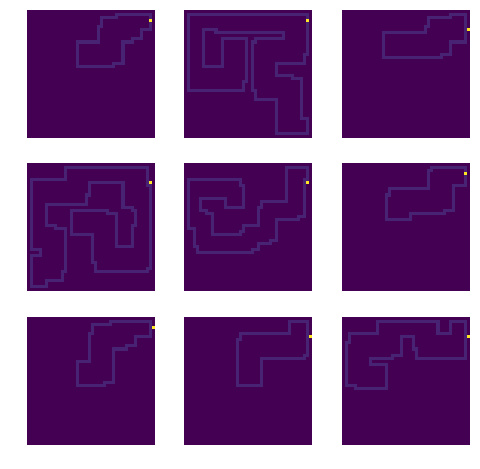

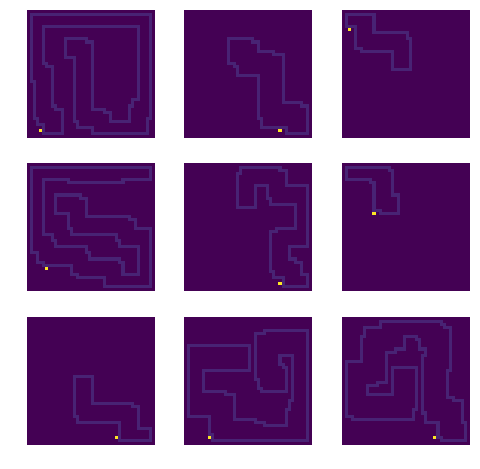

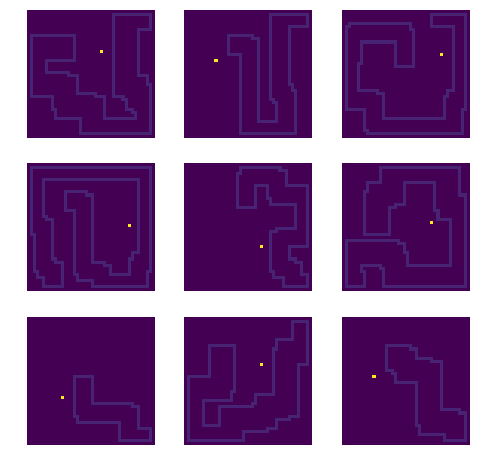

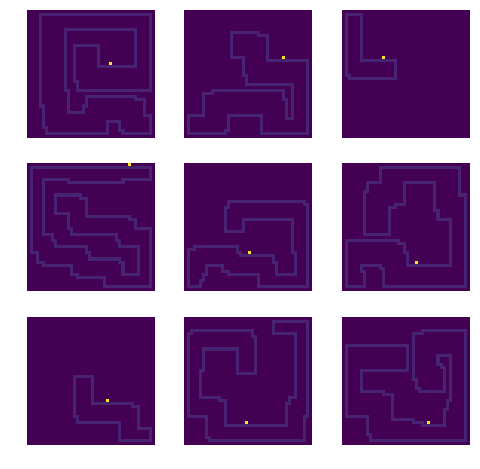

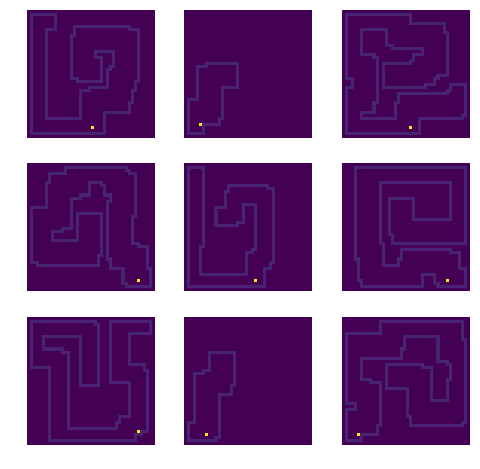

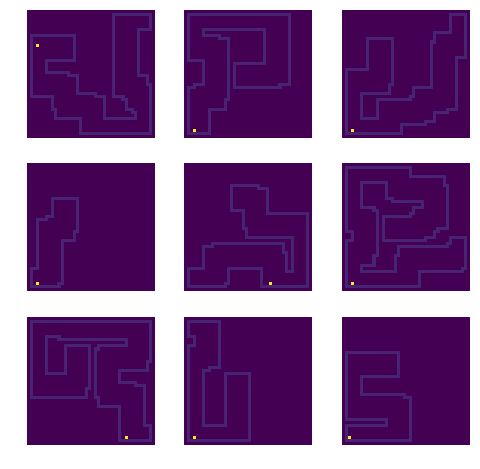

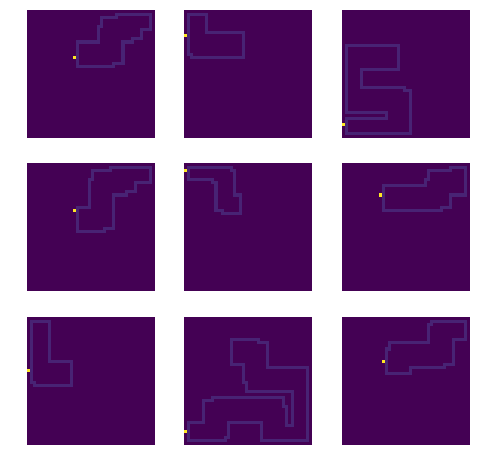

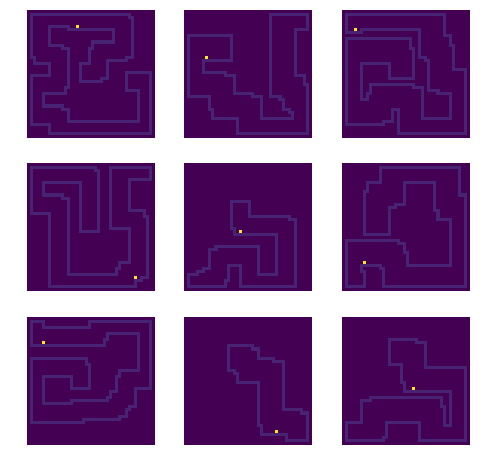

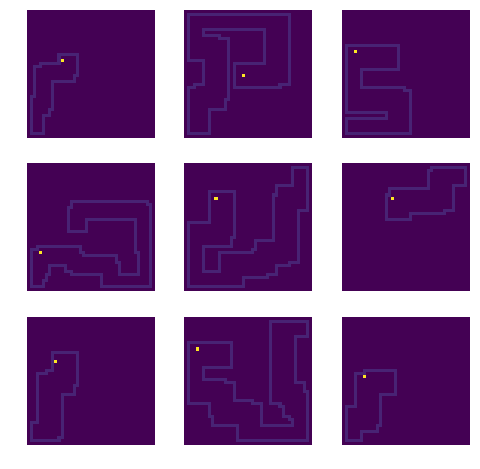

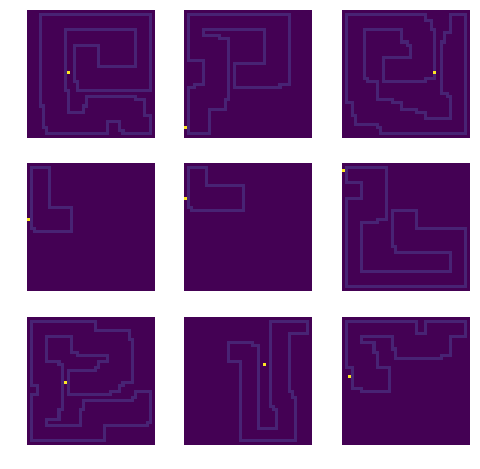

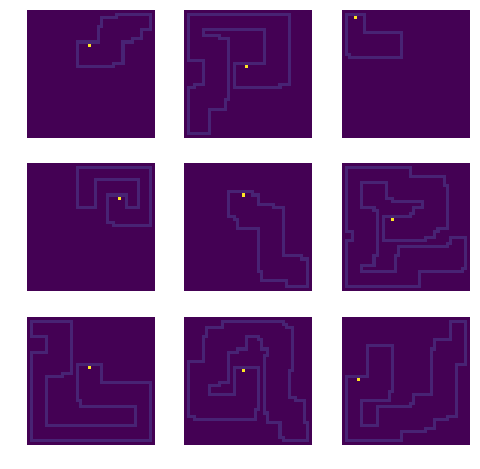

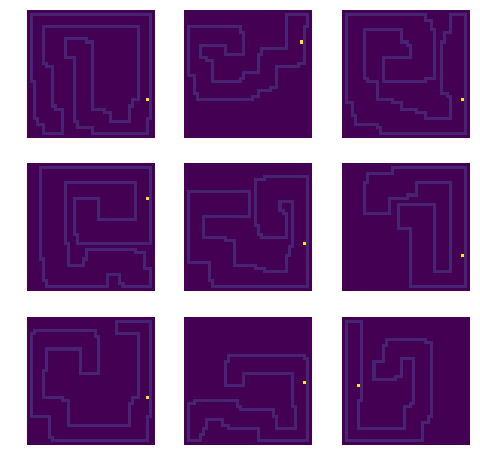

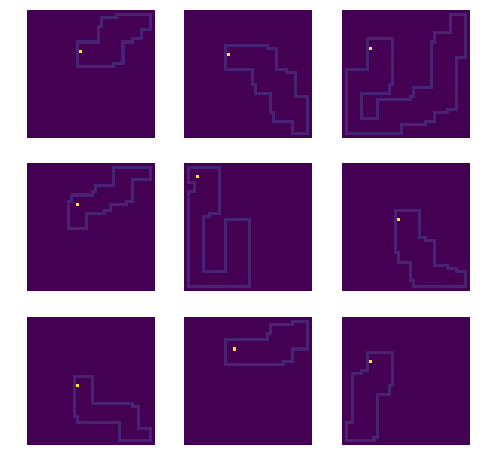

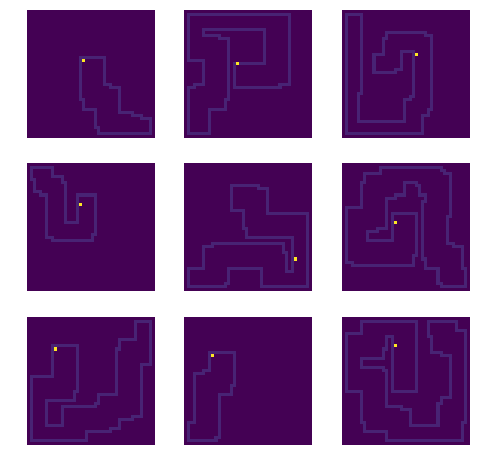

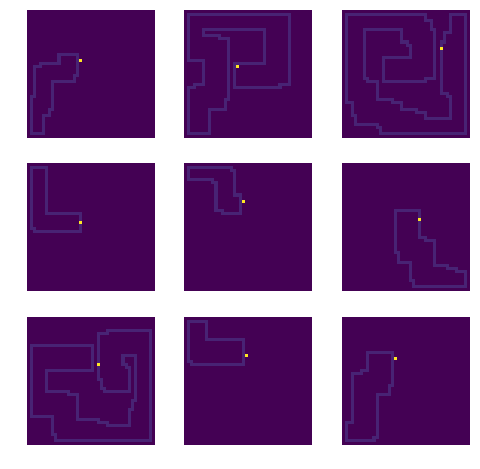

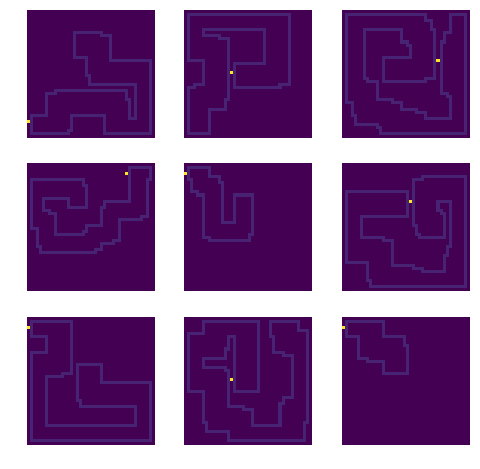

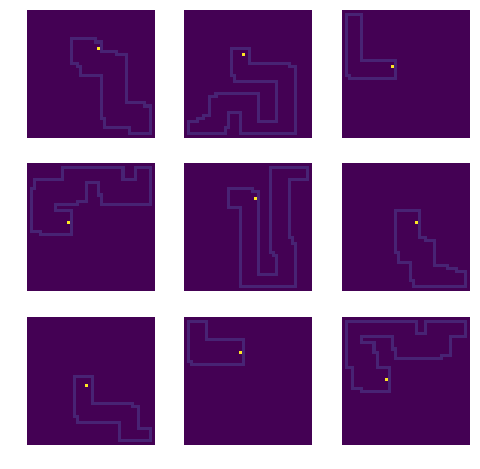

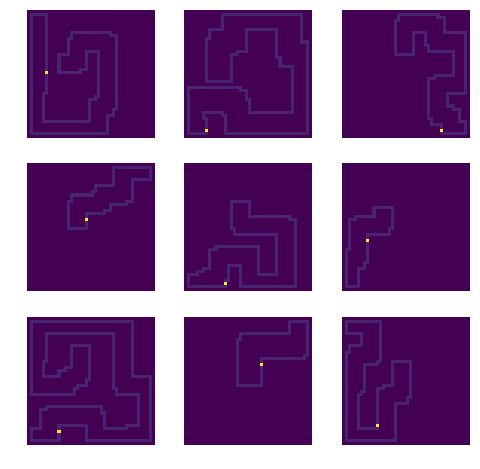

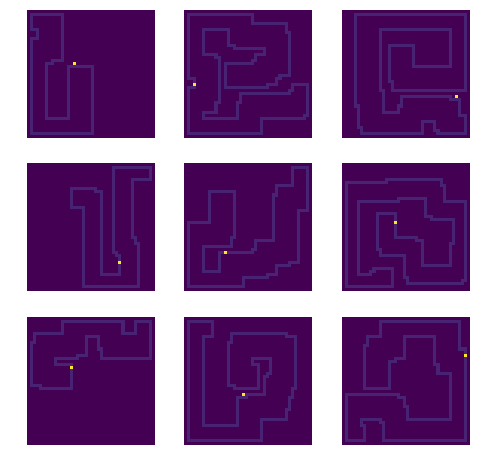

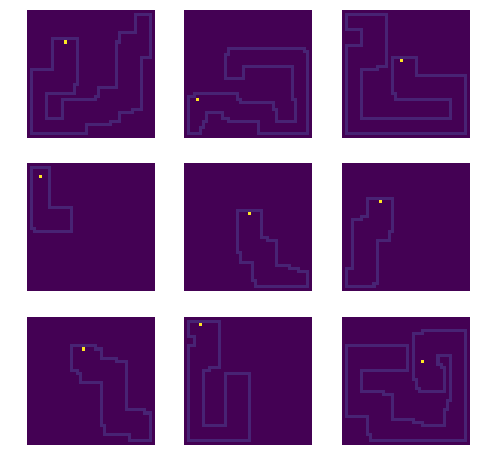

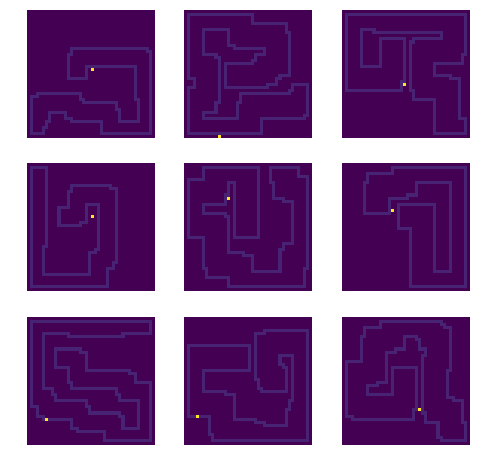

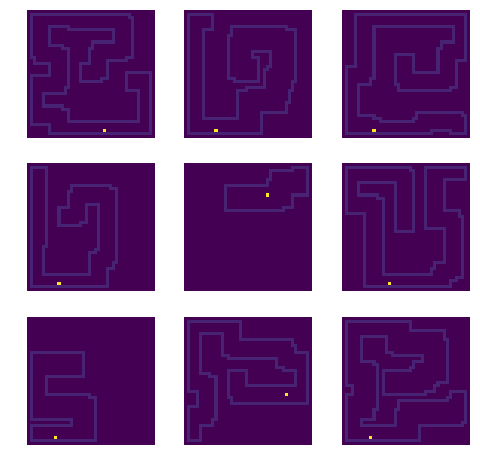

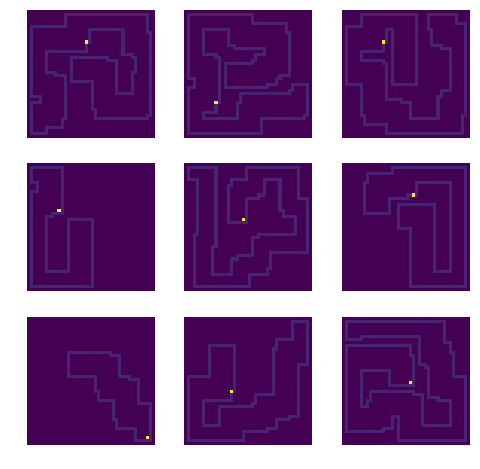

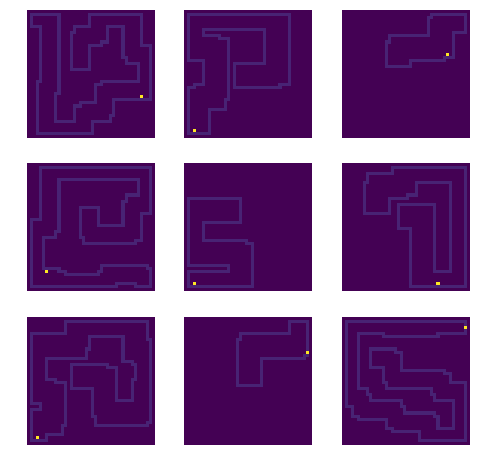

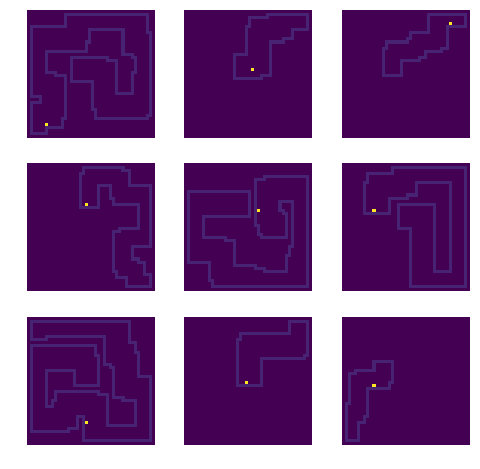

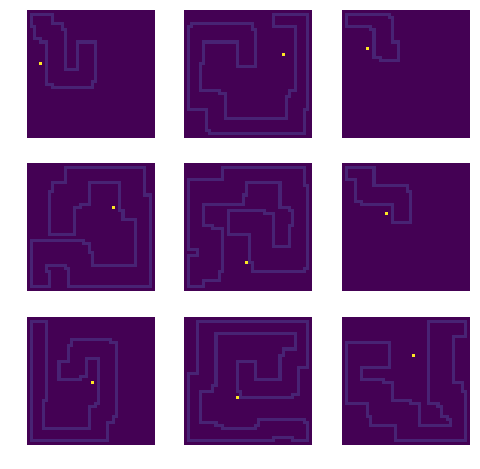

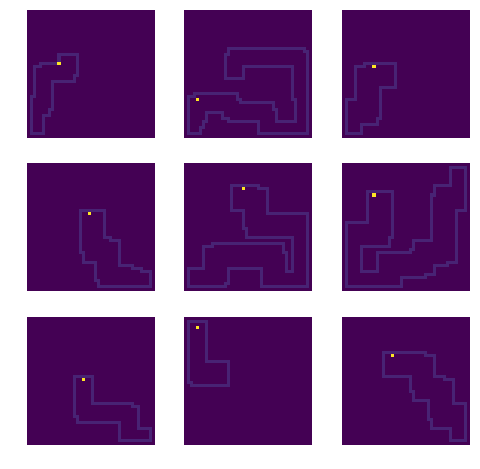

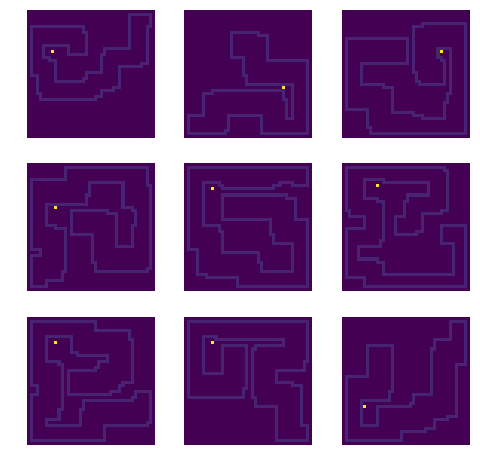

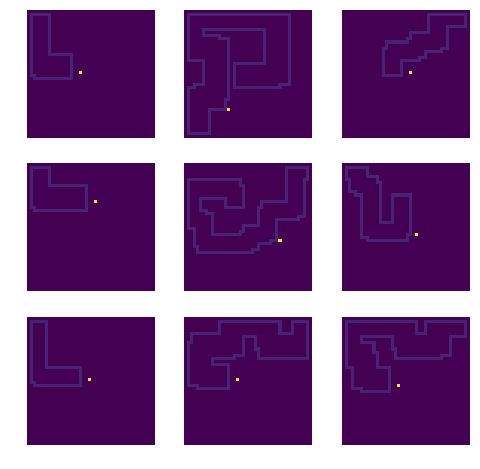

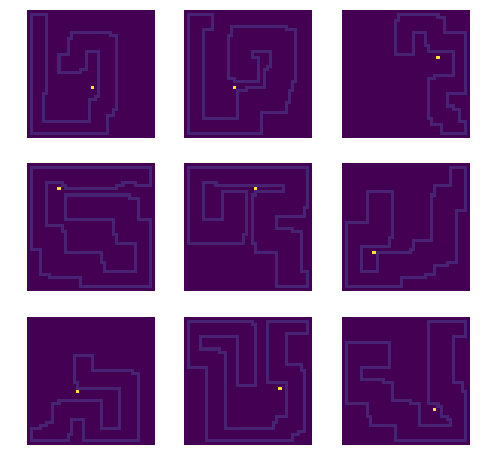

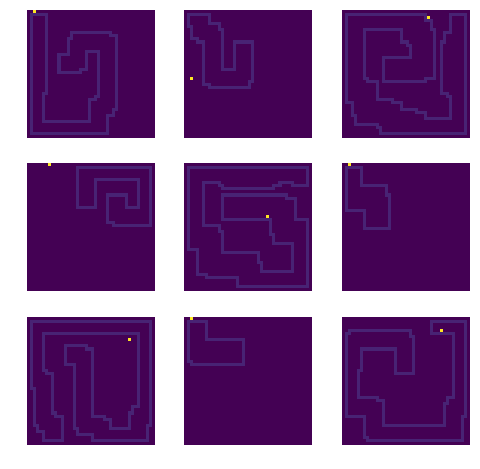

In [112]:
NUM_BATCH = 2
LAYER = 5
NUM_TOP_CELLS = 9

import copy
for k in range(np.shape(data_point[0][0][LAYER])[-1]):
    idx = np.zeros([NUM_TOP_CELLS, 4]) #batch num, num image, x, y
    act = np.zeros([NUM_TOP_CELLS])
    idx_min = 0
    for j in range(np.shape(data_point[0][0][LAYER])[0]):
        for i in range(NUM_BATCH):
            if np.amax(data_point[i][0][LAYER][j,:,:,k]) > act[idx_min]:
                idx[idx_min, 0] = i
                idx[idx_min, 1] = j
                dd = data_point[i][0][LAYER][j,:,:,k]
                idx[idx_min, 2] =  np.unravel_index(np.argmax(dd), dd.shape)[0]
                idx[idx_min, 3] =np.unravel_index(np.argmax(dd), dd.shape)[1]
                act[idx_min] = np.amax(data_point[i][0][LAYER][j,:,:,k])
                
                idx_min = 0
                for ind in range(NUM_TOP_CELLS):
                    if act[ind] < act[idx_min]:
                        idx_min = ind
                   
    fig = plt.figure(figsize=(8, 8))
    columns = np.sqrt(NUM_TOP_CELLS)
    rows = np.sqrt(NUM_TOP_CELLS)
    ax = []
    
    for ind in range(NUM_TOP_CELLS):
        ax.append( fig.add_subplot(rows, columns, ind+1) )
        idd = idx[ind,:].astype(int)
        im = copy.deepcopy(np.squeeze(data_point[idd[0]][1][idd[1],:,:]))
        im[idd[2],idd[3]] = 10        
        plt.imshow(im)
        plt.axis('off')
    

In [45]:
np.shape(data_point[0][1])

(128, 42, 42)